In [144]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
data = pd.read_csv("onlinedata.csv")


In [145]:
data=data.drop(["InvoiceNo","Description","CustomerID"],axis=1)
data.head(2)

,StockCode,Quantity,InvoiceDate,UnitPrice,Country
0,85123A,6.0,01-12-2010 08:26,2.55,United Kingdom
1,71053,6.0,01-12-2010 08:26,3.39,United Kingdom


In [146]:
data["InvoiceDate"]=pd.Categorical(data["InvoiceDate"]).codes
data.head(2)

,StockCode,Quantity,InvoiceDate,UnitPrice,Country
0,85123A,6.0,261,2.55,United Kingdom
1,71053,6.0,261,3.39,United Kingdom


In [147]:
for i in data.columns:
    print (i)
    data[i]=pd.Categorical(data[i]).codes
X=data
data.head(2)


StockCode
Quantity
InvoiceDate
UnitPrice
Country


,StockCode,Quantity,InvoiceDate,UnitPrice,Country
0,3017,191,262,133,34
1,2327,191,262,166,34


In [148]:
from sklearn.preprocessing import StandardScaler
X = data.values[:,1:]
X = np.nan_to_num(X)
Clus_dataSet = StandardScaler().fit_transform(X)
X=Clus_dataSet
X

array([[ -0.1339661 ,  -1.66858551,  -0.07120075,   0.26860446],
       [ -0.1339661 ,  -1.66858551,   0.2875468 ,   0.26860446],
       [ -0.0269126 ,  -1.66858551,  -0.01684506,   0.26860446],
       ...,
       [  0.18719442,   1.53725349,  -1.18005679,   0.26860446],
       [  0.18719442,   1.53725349,  -1.18005679,   0.26860446],
       [-10.4111029 ,  -1.76527364,  -1.5279332 ,  -6.0527197 ]])

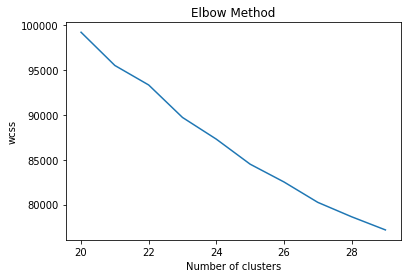

In [149]:
from sklearn.cluster import KMeans
wcss = []
for i in range(20,30):
    #km=KMeans(n_clusters=i,init='k-means++', max_iter=18, n_init=9, random_state=0)
    km=KMeans(n_clusters=i,init='k-means++',n_init=9)
    km.fit(X)
    wcss.append(km.inertia_)
plt.plot(range(20,30),wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('wcss')
plt.show()

In [150]:
km=KMeans(n_clusters=8,init='k-means++', n_init=9)


In [151]:
km.fit(X)
labels = km.labels_
print(labels)

[7 1 7 ... 0 0 2]


In [128]:
C = km.cluster_centers_
print(C)

[[1490.43192206  193.86113784 8738.94467164  139.55653115   32.46779529]
 [2495.98103241  192.95588235 1483.1484994   144.45438175   32.9027611 ]
 [1007.91863306  194.56066539 4958.03199786  132.39709476   32.23057871]
 [2417.91194938  193.38948649 6470.35716719  148.45105865   32.61504016]
 [1018.61524986  192.34735803 2744.05137433  139.70637322   32.5587158 ]
 [2330.44040597  193.82081938 3906.14336575  148.24034221   32.6404166 ]
 [1045.10977708  193.83359462  891.13126601  133.95296907   32.43482583]
 [ 966.17806158  193.15362241 6986.65163318  137.10066531   32.49690749]]


In [152]:
data["cluster_label"] = labels


In [130]:
data.head(50)

,StockCode,Quantity,InvoiceDate,UnitPrice,Country,cluster_label
0,3017,191,262,133,34,1
1,2327,191,262,166,34,1
2,2548,193,262,138,34,1
3,2498,191,262,166,34,1
4,2497,191,262,166,34,1
5,1647,187,262,270,34,6
6,788,191,262,191,34,6
7,1532,191,263,97,34,6
8,1531,191,263,97,34,6
9,2795,217,264,89,34,1
